In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 
from datenbank import daten

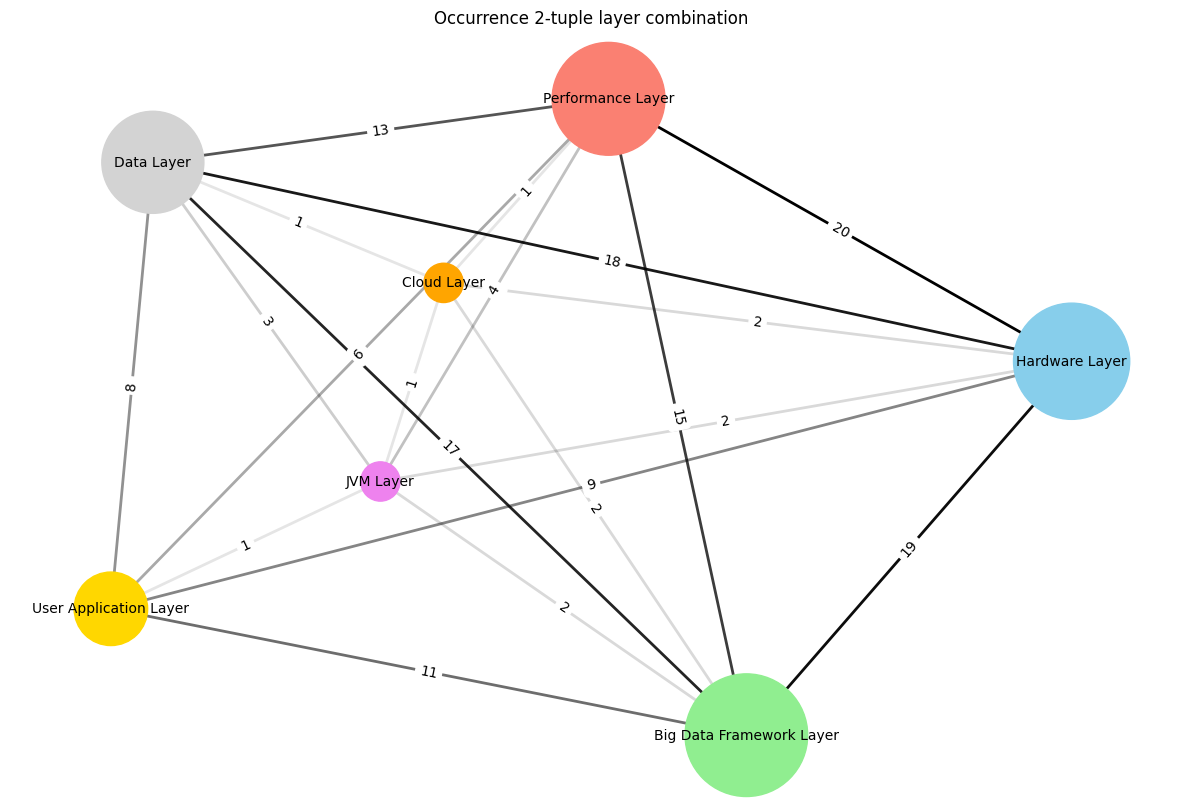

In [14]:
# Initialisieren eines ungerichteten Graphen
G_combined = nx.Graph()

# Hinzufügen jeder Kantenkombination zu G_combined mit der entsprechenden Häufigkeit
for tupel, anzahl in daten.items():
    # Erstellen aller möglichen 2-Kombinationen innerhalb jedes Tupels
    for i in range(len(tupel)):
        for j in range(i + 1, len(tupel)):
            edge = (tupel[i], tupel[j])
            if G_combined.has_edge(*edge):
                G_combined[edge[0]][edge[1]]['weight'] += anzahl
            else:
                G_combined.add_edge(*edge, weight=anzahl)

# Farbcodierung für die Schichten
layer_colors = {
    'Hardware Layer': 'skyblue',
    'Big Data Framework Layer': 'lightgreen',
    'Performance Layer': 'salmon',
    'User Application Layer': 'gold',
    'JVM Layer': 'violet',
    'Data Layer': 'lightgrey',
    'Cloud Layer': 'orange'
}
colors_agg = [layer_colors[node] for node in G_combined.nodes()]

# Knotenhäufigkeit berechnen
knoten_haeufigkeit_combined = {node: 0 for node in G_combined.nodes()}
for tupel, anzahl in daten.items():
    for node in tupel:
        knoten_haeufigkeit_combined[node] += anzahl

# Knotengrößen anpassen
knoten_groessen_combined = [knoten_haeufigkeit_combined[node] * 200 for node in G_combined.nodes()]

# Normalisierte Gewichte für Transparenz
gewichte = [d['weight'] for (u, v, d) in G_combined.edges(data=True)]
min_gewicht = min(gewichte)
max_gewicht = max(gewichte)
normalisierte_gewichte = [1 + 9 * (gewicht - min_gewicht) / (max_gewicht - min_gewicht) for gewicht in gewichte]
alpha_werte_korrekt = [0.1 + 0.9 * (gewicht - min(normalisierte_gewichte)) / (max(normalisierte_gewichte) - min(normalisierte_gewichte)) for gewicht in normalisierte_gewichte]


# Graph zeichnen mit dem Kamada-Kawai-Layout
plt.figure(figsize=(15, 10))
pos_combined = nx.kamada_kawai_layout(G_combined)

# if "JVM Layer" in pos_combined:
#     pos_combined["JVM Layer"] += np.array([0.1, 0.1])

nx.draw_networkx_nodes(G_combined, pos_combined, node_size=knoten_groessen_combined, node_color=colors_agg)

# Kanten zeichnen mit angepassten Alpha-Werten
for (u, v), alpha in zip(G_combined.edges(), alpha_werte_korrekt):
    nx.draw_networkx_edges(G_combined, pos_combined, edgelist=[(u, v)], alpha=alpha, width=2)

# Anpassen der Knotenbeschriftungen ohne die G_combined
knoten_labels = {node: node for node in G_combined.nodes()}
nx.draw_networkx_labels(G_combined, pos_combined, labels=knoten_labels, font_size=10)

# Kantenbeschriftungen hinzufügen
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
nx.draw_networkx_edge_labels(G_combined, pos_combined, edge_labels=edge_labels_combined)

## TODO Darstellen von Blacklayer und Whitelayer Graybox layer
plt.title('Frequencies of the layer combinations')
plt.axis('off')
plt.show()
